# Project 3 - Part 2 - Exploratory Data Analysis 

Tijesunimi Odebode

5/11/2022

In [1]:
# Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Additional Imports
import os, json, math, time
from yelpapi import YelpAPI
from tqdm.notebook import tqdm_notebook

In [2]:
tmd_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)
tmd_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)
tmd_2000

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0015414,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,607290.0,es,La tierra de los toros,...,0.0,53.0,[],Released,NaN,The Land of the Bulls,0.0,0.0,0.0,NaN
2,tt0113086,0.0,NaN,NaN,0.0,[],NaN,612666.0,en,Florentino y el diablo,...,0.0,90.0,[],Released,NaN,Florentino y el diablo,0.0,0.0,0.0,NaN
3,tt0116748,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN
4,tt0118911,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,291822.0,de,Fandango - Members Only,...,0.0,0.0,[],Released,NaN,Fandango - Members Only,0.0,5.5,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,tt8929736,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",NaN,373320.0,ta,பட்ஜெட் பத்மநாபன்,...,0.0,153.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Budget Padmanabhan,0.0,5.8,2.0,NaN
1167,tt9066968,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,732680.0,it,Frida Professione Menager,...,0.0,90.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,NaN,Frida Professione Menager,0.0,0.0,0.0,NaN
1168,tt9209606,0.0,NaN,NaN,0.0,[],NaN,878312.0,mg,Lolovokatra 2,...,0.0,90.0,[],Released,NaN,Lolovokatra 2,0.0,0.0,0.0,NaN
1169,tt9486348,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,514110.0,ar,شجيع السيما,...,0.0,95.0,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",Released,NaN,shajie alsiyama,0.0,4.5,2.0,NaN


In [3]:
tmd_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0079644,0.0,/79axmuH1UGkB7m72jjB9rPff9om.jpg,NaN,0.0,"[{'id': 10752, 'name': 'War'}]",NaN,285529.0,id,November 1828,...,0.0,140.0,"[{'english_name': 'Indonesian', 'iso_639_1': '...",Released,NaN,November 1828,0.0,0.0,0.0,NaN
2,tt0089067,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,210258.0,es,El día de los albañiles 2,...,0.0,90.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,The laborers are back full of love and laughs.,El día de los albañiles 2,0.0,7.1,61.0,NaN
3,tt0114722,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,276251.0,es,3 Noches,...,0.0,105.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,NaN,3 Nights,0.0,0.0,0.0,NaN
4,tt0118578,0.0,/gZn2R8T81zuHuJa0IPosZOpywdh.jpg,NaN,0.0,[],NaN,232795.0,hi,Albela,...,0.0,156.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Albela,0.0,3.8,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,tt8228424,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,740593.0,en,Daag,...,0.0,140.0,[],Released,NaN,Daag,0.0,0.0,0.0,NaN
1194,tt8929248,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,78417.0,ta,அழகான நாட்கள்,...,0.0,150.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Azhagana Naatkal,0.0,0.0,0.0,NaN
1195,tt9099724,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,616033.0,ja,Rokushukan Private Moment,...,0.0,102.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Rokushukan Private Moment,0.0,0.0,0.0,NaN
1196,tt9501738,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,481617.0,zh,绝对情感,...,0.0,87.0,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,NaN,Pure Sentiment,0.0,0.0,0.0,NaN


## 1. Concatenate the data into 1 dataframe 

In [4]:
## Concatenate the data into 1 dataframe. 
tmd_movies = pd.concat([tmd_2000, tmd_2001],
                      ignore_index=True)
display(tmd_movies)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0015414,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,607290.0,es,La tierra de los toros,...,0.0,53.0,[],Released,NaN,The Land of the Bulls,0.0,0.0,0.0,NaN
2,tt0113086,0.0,NaN,NaN,0.0,[],NaN,612666.0,en,Florentino y el diablo,...,0.0,90.0,[],Released,NaN,Florentino y el diablo,0.0,0.0,0.0,NaN
3,tt0116748,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN
4,tt0118911,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,291822.0,de,Fandango - Members Only,...,0.0,0.0,[],Released,NaN,Fandango - Members Only,0.0,5.5,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,tt8228424,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,740593.0,en,Daag,...,0.0,140.0,[],Released,NaN,Daag,0.0,0.0,0.0,NaN
2365,tt8929248,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,78417.0,ta,அழகான நாட்கள்,...,0.0,150.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Azhagana Naatkal,0.0,0.0,0.0,NaN
2366,tt9099724,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,616033.0,ja,Rokushukan Private Moment,...,0.0,102.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Rokushukan Private Moment,0.0,0.0,0.0,NaN
2367,tt9501738,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,481617.0,zh,绝对情感,...,0.0,87.0,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,NaN,Pure Sentiment,0.0,0.0,0.0,NaN


## 2. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

- Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [5]:
df_fin = (tmd_movies["budget"] > 0) | (tmd_movies["revenue"] > 0)
df_fin

0       False
1       False
2       False
3       False
4       False
        ...  
2364    False
2365    False
2366    False
2367    False
2368    False
Length: 2369, dtype: bool

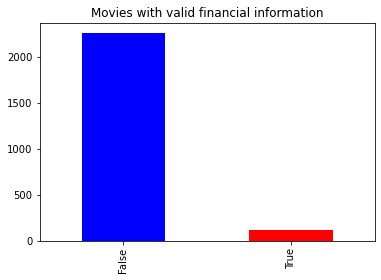

False    2259
True      110
dtype: int64

In [6]:
fin = df_fin.value_counts()

#Let's give it some color
fin.plot(kind = 'bar', color = ['blue','red'])
plt.title('Movies with valid financial information')
plt.show()

fin

- From the above, it looks like only 110 movies had valid financial information (values > 0 for budget OR revenue). 

## 3. How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [7]:
plotdf = tmd_movies.loc[df_fin]
movie_cat = plotdf['certification'].value_counts().sort_values()
movie_cat

NC-17    1
G        1
PG-13    1
R        2
Name: certification, dtype: int64

- The above output has the number of movies in each certification category. The values on the left are the certification categories. The values on the right are the numbers of movies.

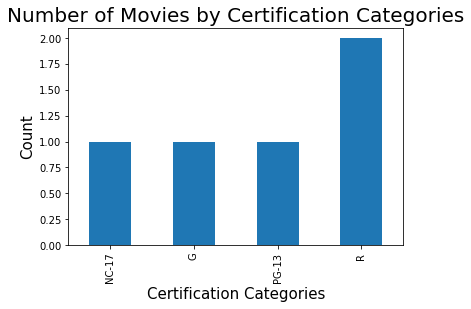

NC-17    1
G        1
PG-13    1
R        2
Name: certification, dtype: int64

In [8]:
movie_cat.plot(kind = 'bar')
plt.title('Number of Movies by Certification Categories', fontsize = 20)
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Certification Categories', fontsize = 15)

#Show your figure
plt.show()

#Display the count chart the plot
movie_cat

- The above plot shows the number of movies in each certification category. 

## 4. What is the average revenue per certification category?

Text(0.5, 1.0, 'Average revenue per certification category')

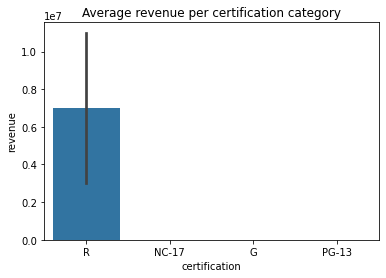

In [9]:
ax = sns.barplot(data=plotdf , x = 'certification', y = 'revenue', ci = 68)
ax.set_title('Average revenue per certification category')

- The above plot has the average revenue per certification category. 

- It is obvious that 'R' category has the highest average revenue

In [10]:
plotdf.groupby('certification')['revenue'].mean()

certification
G              0.0
NC-17      11678.0
PG-13          0.0
R        7001648.0
Name: revenue, dtype: float64

- The above output has the average revenue per certification category. The values on the left are the certification categories. The values on the right are the revenues.

- It is obvious that 'R' category has the highest average revenue

## 5. What is the average budget per certification category?

certification
G         1353676.0
NC-17           0.0
PG-13      500000.0
R        19250000.0
Name: budget, dtype: float64

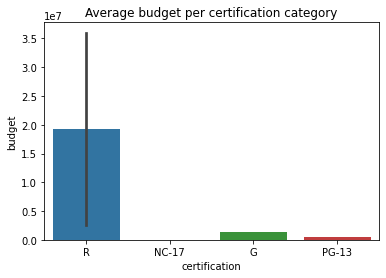

In [11]:
ax = sns.barplot(data=plotdf, x = 'certification', y = 'budget', ci = 68)
ax.set_title('Average budget per certification category')
plotdf.groupby('certification')['budget'].mean()

- The above output and plot have the average budget per certification category. 

- It is obvious that 'R' category has the highest average budget



## 6. Save a final merged .csv.gz of all of the tmdb api data

In [12]:
## Save merged dataframe to file. Saved in 'Data' folder
tmd_movies.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [13]:
## Save merged dataframe to file. Saved in Home page
tmd_movies.to_csv("tmdb_results_combined.csv.gz",compression='gzip',index=False)